# Demonstrate the use of the Elbow Curve method in portfolio management 

1. Choose any SA Equity portfolio - we'll use the Bateleur BCI SA Equity (A1)
2. The objecive is to find the optimal number of assets that this portfolio can hold. 

# Import the necessary packages

In [10]:
import pandas as pd
import numpy as np
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
# plt.style.use('seaborn-ticks')

# Download the data

In [21]:
# Date range
start = '2023-09-30'
end = '2024-10-01'

# Tickers of assets
assets = asset_classes = pd.read_csv("asset_bateleur30.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

market_index = ['^J433.JO']

all_assets = assets + market_index
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  30 of 30 completed


# Calculate the returns

In [22]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,CMH.JO,...,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TRU.JO,^J433.JO
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-03 00:00:00+00:00,-0.0329,-0.0010,-0.0188,-0.0043,-0.0020,0.0049,-0.0042,-0.0047,0.0001,0.0035,...,0.0455,-0.0156,0.0248,0.0217,0.0101,0.0053,-0.0240,-0.0189,-0.0186,-0.0048
2023-10-04 00:00:00+00:00,0.0102,-0.0088,0.0010,-0.0028,-0.0045,-0.0121,-0.0097,-0.0005,0.0047,0.0000,...,0.0033,0.0066,0.0237,-0.0079,-0.0047,-0.0012,-0.0210,0.0005,0.0063,-0.0029
2023-10-05 00:00:00+00:00,-0.0032,0.0346,-0.0077,0.0089,0.0223,0.0220,0.0317,0.0124,0.0282,-0.0035,...,0.0002,0.0054,0.0019,-0.0001,0.0185,0.0089,-0.0120,0.0177,-0.0296,0.0097
2023-10-06 00:00:00+00:00,-0.0059,-0.0394,0.0330,-0.0121,0.0089,0.0004,-0.0203,0.0119,0.0007,0.0032,...,0.0103,0.0202,-0.0125,-0.0122,0.0106,-0.0105,-0.0075,0.0192,-0.0022,0.0048
2023-10-09 00:00:00+00:00,-0.0009,0.0021,0.0036,-0.0046,-0.0122,-0.0104,0.0125,-0.0118,-0.0188,-0.0042,...,-0.0525,-0.0115,-0.0046,0.0002,-0.0191,-0.0138,0.0635,-0.0212,-0.0159,0.0004


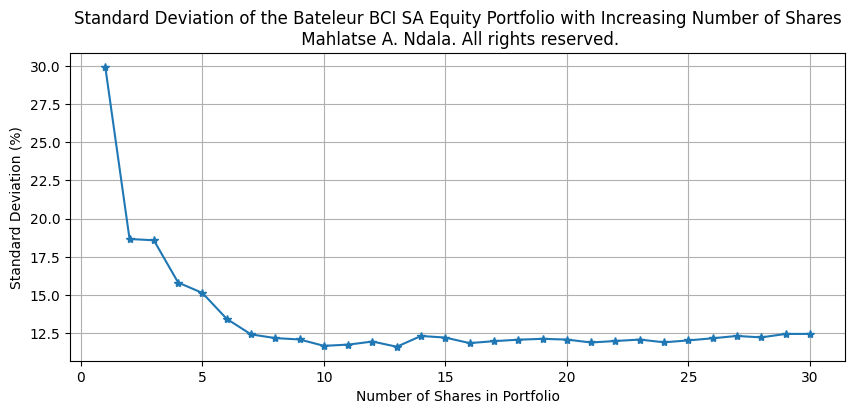

1     29.953
2     18.657
3     18.574
4     15.803
5     15.119
6     13.422
7     12.404
8     12.160
9     12.070
10    11.653
11    11.733
12    11.934
13    11.595
14    12.301
15    12.193
16    11.831
17    11.960
18    12.055
19    12.112
20    12.064
21    11.872
22    11.971
23    12.064
24    11.885
25    12.009
26    12.148
27    12.301
28    12.206
29    12.431
30    12.436
dtype: float64

In [30]:
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(data):

    """
    Calculate standard deviation for portfolios with increasing numbers of shares and visualize the results.

    Args:
    shares_symbols (list): A list of shares symbols

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of shares.
    """

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_shares = np.arange(1, len(Y.columns)+1)

    # Iterate through each portfolio
    for num_shares in number_of_shares:
        # Create equal weights for each constituent in the data
        weights = np.full(num_shares, 1/num_shares)

        # Extract data from whole dataset
        shares_data_subset = Y.iloc[:, :num_shares]

        # Create covariance matrix
        cov_mat = shares_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_shares] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(10, 4))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='*', linestyle='-')
    plt.title('Standard Deviation of the Bateleur BCI SA Equity Portfolio with Increasing Number of Shares\n Mahlatse A. Ndala. All rights reserved.')
    plt.xlabel('Number of Shares in Portfolio')
    plt.ylabel('Standard Deviation (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:57]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(data)
elbow_curve